# Data Preprocessing
Members:
*   John Paul Curada (NB Creator)






## Loading the Dataset

Prepared by John Paul Curada

- In this section, I will utilize the kaggle to make the dataset still available on the cloud so that we can collaborate each other.

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download jeypiic/mangoleafbd-omdena

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# @title Default title text
! unzip mangoleafbd-omdena.zip

Archive:  mangoleafbd-omdena.zip
  inflating: MangoLeafBD_Without_Testset_Augmentation/Test/Cutting Weevil/20211011_162528 (Custom).jpg  
  inflating: MangoLeafBD_Without_Testset_Augmentation/Test/Cutting Weevil/20211011_162158 (Custom).jpg  
  inflating: MangoLeafBD_Without_Testset_Augmentation/Test/Cutting Weevil/20211011_170252 (Custom).jpg  
  inflating: MangoLeafBD_Without_Testset_Augmentation/Test/Cutting Weevil/20211011_131101 (Custom).jpg  
  inflating: MangoLeafBD_Without_Testset_Augmentation/Test/Cutting Weevil/20211011_162359 (Custom) (Custom).jpg  
  inflating: MangoLeafBD_Without_Testset_Augmentation/Test/Cutting Weevil/20211011_140216 (Custom).jpg  
  inflating: MangoLeafBD_Without_Testset_Augmentation/Test/Powdary Mildew/IMG_20211107_125304 (Custom).jpg  
  inflating: MangoLeafBD_Without_Testset_Augmentation/Test/Cutting Weevil/20211011_162500 (Custom).jpg  
  inflating: MangoLeafBD_Without_Testset_Augmentation/Test/Cutting Weevil/20211011_161855 (Custom).jpg  
  inflati

In [ ]:
# Define the data folders
data_directory = '/content/MangoLeafBD_Without_Testset_Augmentation'
test_data = '/content/MangoLeafBD_Without_Testset_Augmentation/Test'
train_data = '/content/MangoLeafBD_Without_Testset_Augmentation/Train'

In [ ]:
# import the necessary libraries
import os
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Train and Test Data

In [ ]:
def get_image_details(image_path):
    """
    Get image details including file size, file name, dimensions, and load the image.

    Args:
        image_path (str): The path to the image file.

    Returns:
        tuple: A tuple containing image data (numpy array), file size (in bytes),
               file name, and image dimensions (width x height).
    """
    img = cv.imread(image_path)

    if img is not None:
        # Get file size in bytes
        file_size = os.path.getsize(image_path)

        # Get file name
        file_name = os.path.basename(image_path)

        # Get image dimensions (width x height)
        height, width = img.shape[:2]

        return img, file_size, file_name, f"{width}x{height}", width, height
    else:
        return None, 0, '', ''

def convert_data_to_pkl_format(data_dir):
    """
    Converts image data from a directory into a Pandas DataFrame and saves it as a pickle file.

    Args:
        data_dir (str): The directory containing subdirectories of disease-specific images.

    Returns:
        pd.DataFrame: A DataFrame containing 'Image', 'Disease', 'FileSize', 'FileName', and 'Dimensions' columns.
    """
    images = []  # List to store image data
    labels = []  # List to store corresponding disease labels
    file_sizes = []  # List to store file sizes
    file_names = []  # List to store file names
    dimensions = []  # List to store image dimensions
    width = [] # List to store image width
    height = [] #  List to store image height

    # Iterate through subdirectories in the given data directory
    for disease in os.listdir(data_dir):
        path_to_disease = os.path.join(data_dir, disease)

        # Check if it's a subdirectory
        if os.path.isdir(path_to_disease):
            # Iterate through image files in the disease-specific subdirectory
            for image in os.listdir(path_to_disease):
                image_path = os.path.join(path_to_disease, image).replace("\\", "/")

                # Get image details
                img, file_size, file_name, dimension, img_width, img_height = get_image_details(image_path)

                if img is not None:
                    # Append image data and corresponding label to lists
                    images.append(img)
                    labels.append(disease)
                    file_sizes.append(file_size)
                    file_names.append(file_name)
                    dimensions.append(dimension)
                    width.append(img_width)
                    height.append(img_height)

    # Create a DataFrame from the collected data
    data = pd.DataFrame({
        'Image': images,
        'Disease': labels,
        'FileSize': file_sizes,
        'FileName': file_names,
        'Dimensions': dimensions,
        'Width': width,
        'Height': height
    })

    # Save the DataFrame as a pickle file
    data.to_pickle('dataset.pkl')

    # Read the saved pickle file (optional)
    data = pd.read_pickle("dataset.pkl")

    return data

# Example usage:

train_df = convert_data_to_pkl_format(train_data)
test_df = convert_data_to_pkl_format(test_data)

In [ ]:
train_df['File Size (kb)'] = train_df['FileSize'] /  (1024)
train_df['Type'] = 'Train'

test_df['File Size (kb)'] = test_df['FileSize'] /  (1024)
test_df['Type'] = 'Test'

In [ ]:
display(train_df, test_df)

,Image,Disease,FileSize,FileName,Dimensions,Width,Height,File Size (kb),Type
0,"[[[227, 221, 222], [228, 222, 223], [230, 224,...",Gall Midge,63612,IMG_20211106_170135 (Custom).jpg,320x240,320,240,62.121094,Train
1,"[[[201, 198, 200], [201, 198, 200], [201, 198,...",Gall Midge,32062,IMG_20211106_161611 (Custom).jpg,314x240,314,240,31.310547,Train
2,"[[[230, 230, 230], [230, 230, 230], [231, 231,...",Gall Midge,31118,IMG_20211106_162644 (Custom).jpg,309x240,309,240,30.388672,Train
3,"[[[186, 191, 190], [186, 191, 190], [186, 191,...",Gall Midge,28054,IMG_20211106_161552 (Custom).jpg,240x320,240,320,27.396484,Train
4,"[[[234, 222, 222], [234, 222, 222], [235, 223,...",Gall Midge,65400,IMG_20211106_170158 (Custom).jpg,320x240,320,240,63.867188,Train
...,...,...,...,...,...,...,...,...,...
3294,"[[[180, 185, 183], [181, 186, 184], [181, 186,...",Die Back,17949,IMG_20211028_003845 (Custom).jpg,240x320,240,320,17.528320,Train
3295,"[[[236, 219, 210], [235, 218, 209], [235, 218,...",Die Back,26970,20211129_163027 (Custom).jpg,240x240,240,240,26.337891,Train
3296,"[[[231, 208, 193], [231, 208, 193], [231, 208,...",Die Back,84364,20211129_162625 (Custom).jpg,240x240,240,240,82.386719,Train
3297,"[[[233, 210, 195], [234, 211, 196], [234, 211,...",Die Back,26607,20211129_162153 (Custom).jpg,240x240,240,240,25.983398,Train


,Image,Disease,FileSize,FileName,Dimensions,Width,Height,File Size (kb),Type
0,"[[[193, 193, 193], [202, 202, 202], [213, 213,...",Gall Midge,19071,IMG_20211106_162656 (Custom).jpg,320x240,320,240,18.624023,Test
1,"[[[141, 177, 185], [141, 177, 185], [142, 178,...",Gall Midge,20127,IMG_20211106_163628 (Custom).jpg,320x240,320,240,19.655273,Test
2,"[[[231, 219, 219], [231, 219, 219], [232, 220,...",Gall Midge,63392,IMG_20211106_170155 (Custom).jpg,320x240,320,240,61.906250,Test
3,"[[[183, 183, 177], [183, 183, 177], [183, 183,...",Gall Midge,61458,IMG_20211106_165644 (Custom).jpg,240x320,240,320,60.017578,Test
4,"[[[135, 145, 155], [135, 145, 155], [135, 145,...",Gall Midge,22993,IMG_20211106_164502 (Custom).jpg,320x240,320,240,22.454102,Test
...,...,...,...,...,...,...,...,...,...
374,"[[[61, 62, 60], [62, 63, 61], [62, 63, 61], [6...",Die Back,24274,IMG_20211028_002755 (Custom).jpg,240x320,240,320,23.705078,Test
375,"[[[227, 204, 188], [228, 205, 189], [229, 206,...",Die Back,25879,20211129_162518 (Custom).jpg,240x240,240,240,25.272461,Test
376,"[[[226, 214, 210], [225, 213, 209], [225, 213,...",Die Back,84394,20211129_164547 (Custom).jpg,240x240,240,240,82.416016,Test
377,"[[[232, 218, 212], [232, 218, 212], [232, 218,...",Die Back,82337,20211129_163908 (Custom).jpg,240x240,240,240,80.407227,Test


In [ ]:
# Concatenate dataset
data_df = pd.concat([train_df, test_df])
data_df

,Image,Disease,FileSize,FileName,Dimensions,Width,Height,File Size (kb),Type
0,"[[[227, 221, 222], [228, 222, 223], [230, 224,...",Gall Midge,63612,IMG_20211106_170135 (Custom).jpg,320x240,320,240,62.121094,Train
1,"[[[201, 198, 200], [201, 198, 200], [201, 198,...",Gall Midge,32062,IMG_20211106_161611 (Custom).jpg,314x240,314,240,31.310547,Train
2,"[[[230, 230, 230], [230, 230, 230], [231, 231,...",Gall Midge,31118,IMG_20211106_162644 (Custom).jpg,309x240,309,240,30.388672,Train
3,"[[[186, 191, 190], [186, 191, 190], [186, 191,...",Gall Midge,28054,IMG_20211106_161552 (Custom).jpg,240x320,240,320,27.396484,Train
4,"[[[234, 222, 222], [234, 222, 222], [235, 223,...",Gall Midge,65400,IMG_20211106_170158 (Custom).jpg,320x240,320,240,63.867188,Train
...,...,...,...,...,...,...,...,...,...
374,"[[[61, 62, 60], [62, 63, 61], [62, 63, 61], [6...",Die Back,24274,IMG_20211028_002755 (Custom).jpg,240x320,240,320,23.705078,Test
375,"[[[227, 204, 188], [228, 205, 189], [229, 206,...",Die Back,25879,20211129_162518 (Custom).jpg,240x240,240,240,25.272461,Test
376,"[[[226, 214, 210], [225, 213, 209], [225, 213,...",Die Back,84394,20211129_164547 (Custom).jpg,240x240,240,240,82.416016,Test
377,"[[[232, 218, 212], [232, 218, 212], [232, 218,...",Die Back,82337,20211129_163908 (Custom).jpg,240x240,240,240,80.407227,Test


## Exploratory Data Analysis
Prepared by John Paul Curada

### Summary Statistics


In [ ]:
display(train_df.describe(), test_df.describe())

,FileSize,Width,Height,File Size (kb)
count,3299.000000,3299.000000,3299.000000,3299.000000
mean,35337.523189,272.054865,266.508639,34.509300
std,16257.648627,39.276535,38.914651,15.876610
min,12077.000000,187.000000,70.000000,11.793945
25%,25839.000000,240.000000,240.000000,25.233398
50%,31650.000000,240.000000,240.000000,30.908203
75%,37418.000000,320.000000,320.000000,36.541016
max,86272.000000,320.000000,320.000000,84.250000


,FileSize,Width,Height,File Size (kb)
count,379.00000,379.000000,379.000000,379.000000
mean,32656.60686,269.195251,271.963061,31.891218
std,15440.71773,38.652828,39.782460,15.078826
min,12326.00000,217.000000,195.000000,12.037109
25%,23225.50000,240.000000,240.000000,22.681152
50%,30574.00000,240.000000,240.000000,29.857422
75%,35733.50000,320.000000,320.000000,34.895996
max,85138.00000,320.000000,320.000000,83.142578


- Train and test data have similar distributions of file sizes, with train data having slightly larger average sizes.

- Both train and test df have a moderate spread of file sizes, with some larger and some smaller files.

- The median file sizes in both datasets are relatively close, indicating that the majority of files are of similar sizes.

- In both dataframe, about 25% of files are smaller than the 25th percentile value, and about 75% are smaller than the 75th percentile value.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [ ]:
# File Size Analysis
fig = make_subplots(rows=1, cols=2, subplot_titles=("Train Data", "Test Data"))

trace1 = go.Histogram(x=train_df["File Size (kb)"].values, showlegend=False)
trace2 = go.Histogram(x=test_df["File Size (kb)"].values, showlegend=False)

fig.append_trace(trace1, 1, 1)
fig.update_xaxes(title_text="File size (kb)", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.append_trace(trace2, 1, 2)
fig.update_xaxes(title_text="File size (kb)", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.update_layout(title="Histogram of File Size for Train and Test Data")

fig.show()


In [ ]:
# Dimensions Analysis

fig = make_subplots(rows=2, cols=1, subplot_titles=("Height", "Width"))

trace1 = go.Histogram(x=data_df["Height"].values, showlegend=False)
trace2 = go.Histogram(x=data_df["Width"].values, showlegend=False)

fig.append_trace(trace1, 1, 1)
fig.update_xaxes(title_text="Height Dimension", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.append_trace(trace2, 2, 1)
fig.update_xaxes(title_text="Width Dimenson", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)

fig.update_layout(title="Histogram of Image Dimensions of the Dataset")

fig.show()


In [ ]:
# Total pictures
len(data_df)

3678

**Height:** 240px - 244px = 2318 (63%)

**Height:** 320px - 324px = 1264 (34%)

**Width:** 240px - 244px = 2190 (60%)

**Width:** 320px - 324px = 1454 (40%)



In [ ]:
data_df[data_df['Height'] < 80]

,Image,Disease,FileSize,FileName,Dimensions,Width,Height,File Size (kb),Type
391,"[[[252, 250, 250], [252, 250, 250], [252, 250,...",Gall Midge,26294,IMG_20211106_163454 (Custom).jpg,320x70,320,70,25.677734,Train


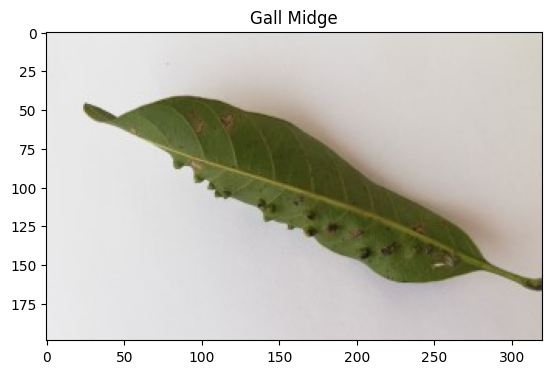

Train/IMG_20211106_163038 (Custom).jpg


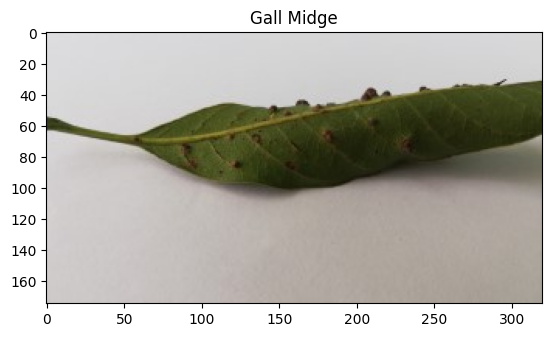

Train/IMG_20211106_161622 (Custom).jpg


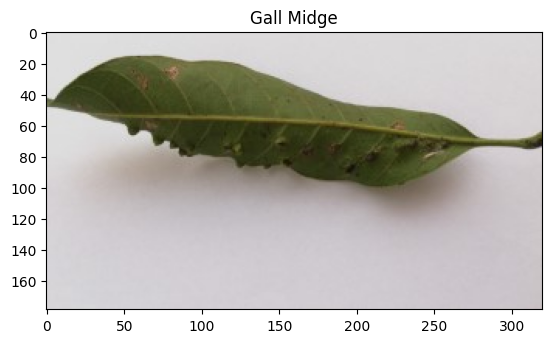

Train/IMG_20211106_164757 (Custom).jpg


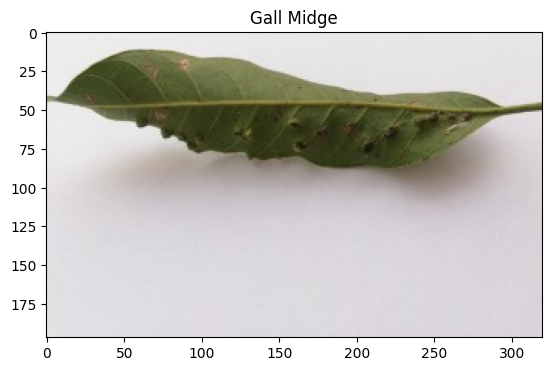

Train/IMG_20211106_164800 (Custom).jpg


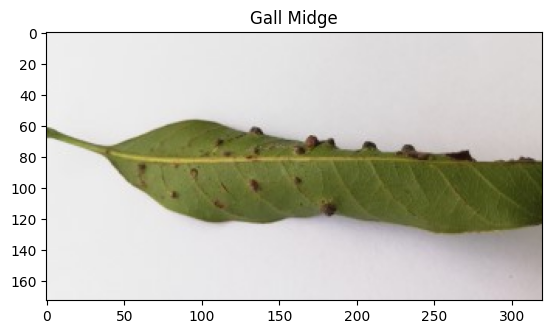

Train/IMG_20211106_161736 (Custom).jpg


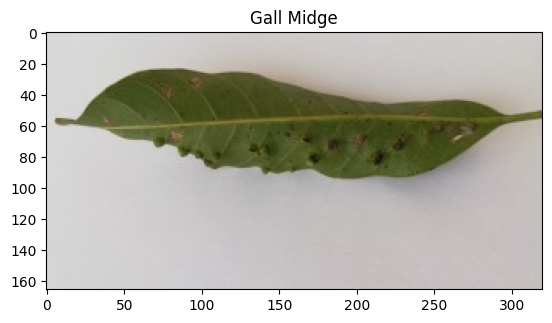

Train/IMG_20211106_163026 (Custom).jpg


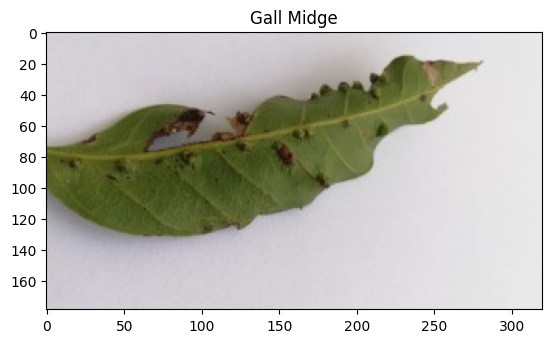

Train/IMG_20211106_162044 (Custom).jpg


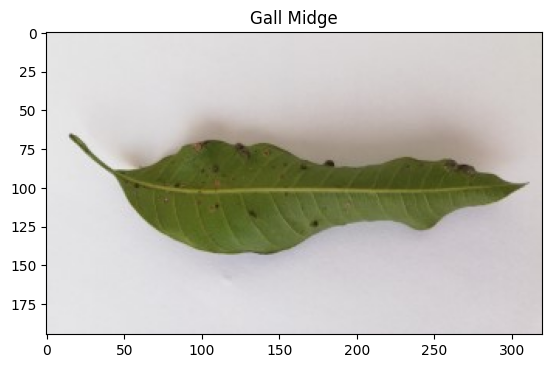

Train/IMG_20211106_162701 (Custom).jpg


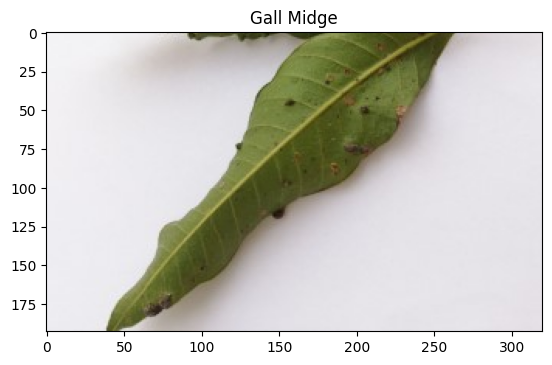

Train/IMG_20211106_163455 (Custom).jpg


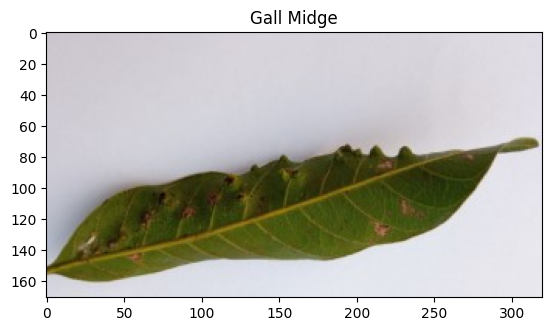

Train/IMG_20211106_165746 (Custom).jpg


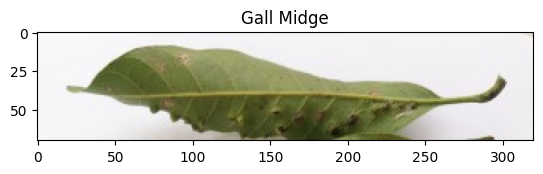

Train/IMG_20211106_163454 (Custom).jpg


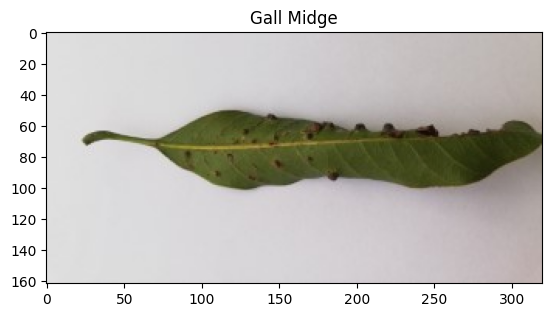

Train/IMG_20211106_161733 (Custom).jpg


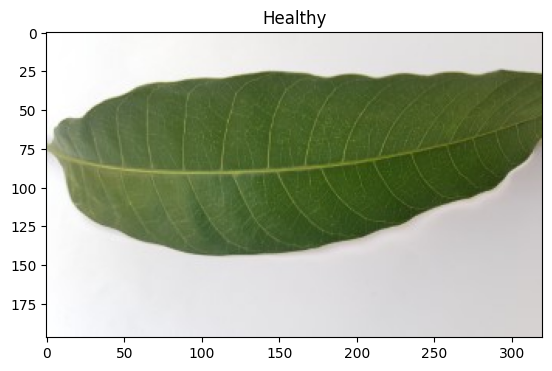

Train/20211231_124534 (Custom).jpg


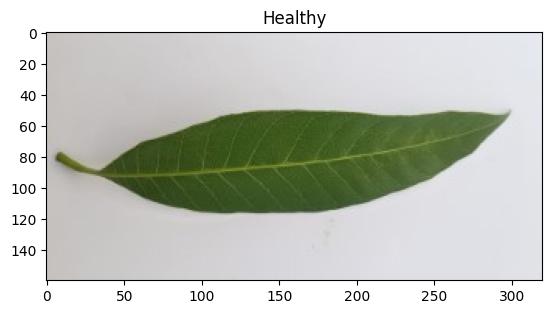

Train/20211231_124348 (Custom).jpg


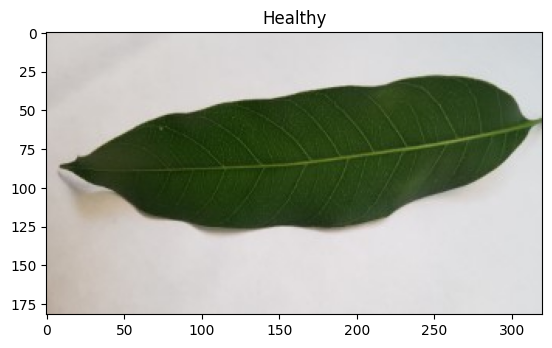

Train/20211231_161439 (Custom).jpg


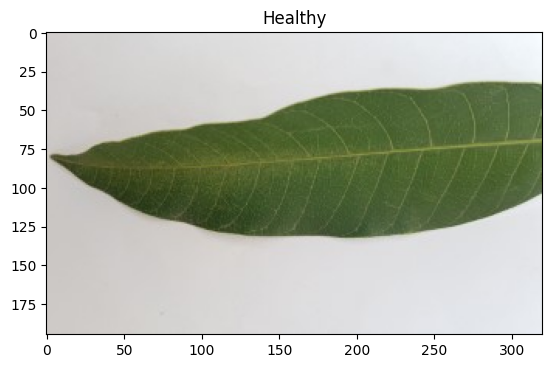

Train/20211231_130337 (Custom).jpg


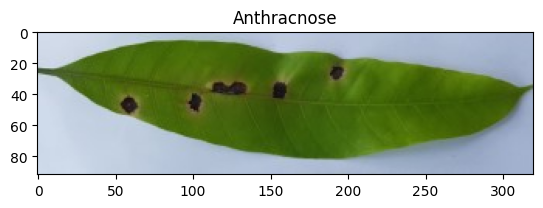

Train/20211011_131259 (Custom).jpg


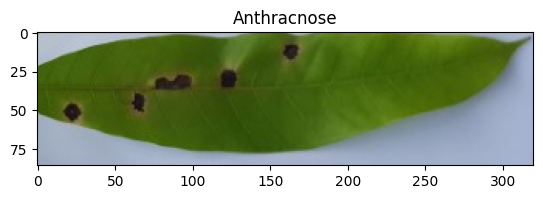

Train/20211011_131304 (Custom).jpg


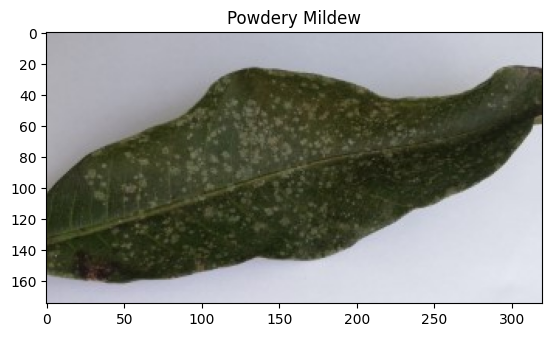

Train/IMG_20211107_130121 (Custom).jpg


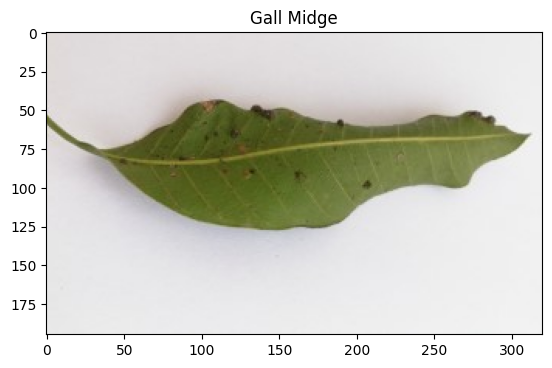

Test/IMG_20211106_162404 (Custom).jpg


In [ ]:
# Load the image that has a height of less than N
def show_image(image, title):
    """
    Display an image with a given title.

    Parameters:
        image (numpy.ndarray): The image to display.
        title (str): The title for the image.

    Returns:
        None
    """
    # Split image channels and convert to RGB format
    b, g, r = cv.split(image)
    frame_rgb = cv.merge((r, g, b))

    # Display the image with a title
    plt.imshow(frame_rgb)
    plt.title(title)
    plt.show()

for index, row in data_df[data_df['Height'] < 200].iterrows():
    image = row['Image']
    disease = row['Disease']
    file_name = row['FileName']
    train_or_test = row['Type']
    show_image(image, disease)
    print(f"{train_or_test}/{file_name}")


### Class Distribution

In [ ]:
train_df['Disease'].value_counts()

Sooty Mould         450
Healthy             450
Powdery Mildew      448
Die Back            437
Bacterial Canker    434
Gall Midge          432
Anthracnose         428
Cutting Weevil      220
Name: Disease, dtype: int64

In [ ]:
test_df['Disease'].value_counts()

Gall Midge          50
Scooty Mould        50
Healthy             50
Anthracnose         50
Powdary Mildew      50
Die Back            50
Bacterial Canker    49
Cutting Weevil      30
Name: Disease, dtype: int64

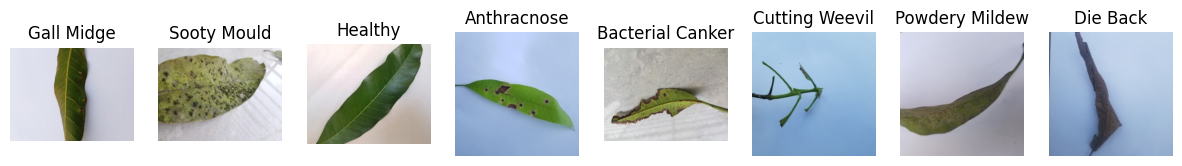

In [ ]:
# Load the images
def show_images_side_by_side(images, titles):
    """
    Display multiple images side by side with corresponding titles.

    Args:
        images (list): List of image data (numpy.ndarray).
        titles (list): List of titles for each image.

    Returns:
        None
    """
    num_images = len(images)

    # Set up subplots in a row
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        # Convert BGR to RGB format for matplotlib
        img_rgb = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)

        # Display the image with the corresponding title
        axes[i].imshow(img_rgb)
        axes[i].set_title(titles[i])
        axes[i].axis('off')  # Turn off axis labels

    plt.show()

# Initialize lists to store selected images and titles
selected_images = []
disease_titles = []

# Randomly select one image for each disease
for disease in train_df['Disease'].unique():
    selected_row = train_df[train_df['Disease'] == disease].sample(1)
    image = selected_row['Image'].values[0]
    selected_images.append(image)
    disease_titles.append(disease)

# Display selected images side by side
show_images_side_by_side(selected_images, disease_titles)


In [ ]:
# Class Distribution Analysis

fig = px.histogram(data_df, x="Disease", color="Type", barmode='group')

fig.show()


**Train Series:**

- **Sooty Mould:** 450 instances
- **Healthy:** 450 instances
- **Powdery Mildew:** 448 instances
- **Die Back:** 437 instances
- **Bacterial Canker:** 434 instances
- **Gall Midge:** 432 instances
- **Anthracnose:** 428 instances
- **Cutting Weevil:** 220 instances

**Test Series:**

- **Gall Midge:** 50 instances
- **Sooty Mould:** 50 instances (Note: Typo correction from "Scooty Mould")
- **Healthy:** 50 instances
- **Anthracnose:** 50 instances
- **Powdery Mildew:** 50 instances (Note: Typo correction from "Powdary Mildew")
- **Die Back:** 50 instances
- **Bacterial Canker:** 49 instances
- **Cutting Weevil:** 28 instances

**Observations:**
- The class cutting weevil is undersampled.

- There are some typographical errors in the test dataset ("Scooty Mould" and "Powdary Mildew") that should be corrected.

- The number of instances of each disease class varies, with some diseases being more prevalent than others in both train and test datasets.
